# Deep Network Models

Constructing and training your own ConvNet from scratch can be Hard and a long task.

A common trick used in Deep Learning is to use a **pre-trained** model and finetune it to the specific data it will be used for. 

## Famous Models with Keras


This notebook contains code and reference for the following Keras models (gathered from [https://github.com/fchollet/keras/tree/master/keras/applications]())

- VGG16
- VGG19
- ResNet50
- Inception v3
- Xception
- ... more to come


## References

- [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556) - please cite this paper if you use the VGG models in your work.
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - please cite this paper if you use the ResNet model in your work.
- [Rethinking the Inception Architecture for Computer Vision](http://arxiv.org/abs/1512.00567) - please cite this paper if you use the Inception v3 model in your work.


All architectures are compatible with both TensorFlow and Theano, and upon instantiation the models will be built according to the image dimension ordering set in your Keras configuration file at `~/.keras/keras.json`. 

For instance, if you have set `image_data_format="channels_last"`, then any model loaded from this repository will get built according to the TensorFlow dimension ordering convention, "Width-Height-Depth".

# VGG16

<img src="imgs/vgg16.png" >

# VGG19

<img src="imgs/vgg19.png" >

# `keras.applications`

In [30]:
from keras.applications import VGG16
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import os

In [2]:
# -- Jupyter/IPython way to see documentation
# please focus on parameters (e.g. include top)
VGG16??

In [31]:
vgg16 = VGG16(include_top=True, weights='imagenet')

If you're wondering **where** this `HDF5` files with weights is stored, please take a look at `~/.keras/models/`

#### HandsOn VGG16 - Pre-trained Weights

In [22]:
IMAGENET_FOLDER = 'imgs/imagenet'  #in the repo

In [23]:
!ls imgs/imagenet

apricot_565.jpeg  apricot_787.jpeg	strawberry_1174.jpeg
apricot_696.jpeg  strawberry_1157.jpeg	strawberry_1189.jpeg


<img src="imgs/imagenet/strawberry_1157.jpeg" >

In [24]:
from keras.preprocessing import image
import numpy as np

img_path = os.path.join(IMAGENET_FOLDER, 'strawberry_1157.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n07745940', 'strawberry', 0.98570204), ('n07836838', 'chocolate_sauce', 0.005128039), ('n04332243', 'strainer', 0.003665844), ('n07614500', 'ice_cream', 0.0021996102), ('n04476259', 'tray', 0.0011693746)]]


<img src="imgs/imagenet/apricot_696.jpeg" >

In [14]:
img_path = os.path.join(IMAGENET_FOLDER, 'apricot_696.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n07747607', 'orange', 0.87526792), ('n07749582', 'lemon', 0.03620464), ('n07717556', 'butternut_squash', 0.021843448), ('n03937543', 'pill_bottle', 0.0126132), ('n03942813', 'ping-pong_ball', 0.0054204506)]]


<img src="imgs/imagenet/apricot_565.jpeg" >

In [15]:
img_path = os.path.join(IMAGENET_FOLDER, 'apricot_565.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n07718472', 'cucumber', 0.29338178), ('n07716358', 'zucchini', 0.2383192), ('n04596742', 'wok', 0.042132568), ('n07716906', 'spaghetti_squash', 0.038422), ('n07711569', 'mashed_potato', 0.036552209)]]


# Hands On:

### Try to do the same with VGG19 Model

In [ ]:
# from keras.applications import VGG19

# Residual Networks

<img src="imgs/resnet_bb.png" >

## ResNet 50

<img src="imgs/resnet34.png" >

In [1]:
from keras.applications import ResNet50

A ResNet is composed by two main blocks: **Identity Block** and the **ConvBlock**.

* IdentityBlock is the block that has no conv layer at shortcut
* ConvBlock is the block that has a conv layer at shortcut

In [3]:
from keras.applications.resnet50 import identity_block, conv_block

In [4]:
identity_block??

In [5]:
conv_block??

---

# Visualising Convolutional Filters of a CNN

(Adapter from `conv_filter_visualisation` in [**Keras Examples**](https://github.com/fchollet/keras/blob/master/examples/conv_filter_visualization.py)

In [32]:
from scipy.misc import imsave
import numpy as np
import time
from keras.applications import vgg16
from keras import backend as K

In [44]:
# dimensions of the generated pictures for each filter.
img_width = 224
img_height = 224

In [34]:
# the name of the layer we want to visualize
# (see model definition at keras/applications/vgg16.py)
layer_name = 'block5_conv1'

In [35]:
# utility function to convert a tensor into a valid image

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [36]:
from keras.applications import vgg16

# build the VGG16 network with ImageNet weights
model = vgg16.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')

Model loaded.


In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [38]:
# this is the placeholder for the input images
input_img = model.input

In [39]:
# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])

In [40]:
def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

In [41]:
img_path = os.path.join(IMAGENET_FOLDER, 'strawberry_1157.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
input_img_data = image.img_to_array(img)
input_img_data = np.expand_dims(input_img_data, axis=0)
input_img_data = preprocess_input(input_img_data)
print('Input image shape:', x.shape)

Input image shape: (1, 224, 224, 3)


In [42]:
kept_filters = []
for filter_index in range(0, 50):
    # we only scan through the first 50 filters,
    # but there are actually 512 of them
    if filter_index % 10 == 0:
        print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :, :])
    else:
        loss = K.mean(layer_output[:, :, :, filter_index])

    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        img = deprocess_image(input_img_data[0])
        kept_filters.append((img, loss_value))
    end_time = time.time()

Processing filter 0
Processing filter 10
Processing filter 20
Processing filter 30
Processing filter 40


In [49]:
# we will stich the best 64 filters on a 8 x 8 grid.
n = 6

# the filters that have the highest loss are assumed to be better-looking.
# we will only keep the top 64 filters.
kept_filters.sort(key=lambda x: x[1], reverse=True)
kept_filters = kept_filters[:n * n]

In [50]:
len(kept_filters)

36

In [51]:
# build a black picture with enough space for
# our 6 x 6 filters of size 128 x 128, with a 5px margin in between
margin = 5
width = n * img_width + (n - 1) * margin
height = n * img_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

# fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        img, loss = kept_filters[i * n + j]
        stitched_filters[(img_width + margin) * i: (img_width + margin) * i + img_width,
                         (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img

In [52]:
from matplotlib import pyplot as plt

%matplotlib inline

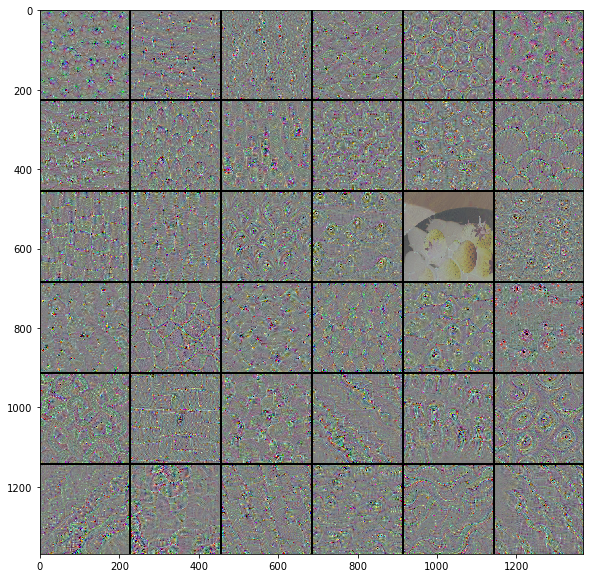

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(stitched_filters)